# 04_forecast

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np
import pandas as pd

import plotly.graph_objects as go


## Carregando os dados

In [2]:
# Dados
df = pd.read_csv('../data/processed/store_1_prepared.csv', parse_dates=['Date'])

## Modelagem

In [3]:
# Previsões feitas
forecast = pd.read_csv('../data/processed/forecast_prophet.csv', parse_dates=['ds'])  # ou reutilizar do notebook anterior
display(forecast.head(), forecast.shape)
forecast_predict = pd.read_csv('../data/processed/forecast_predict.csv', parse_dates=['ds'])  # ou reutilizar do notebook anterior

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5233.606536,4511.082282,6631.088826,5233.606536,5233.606536,326.915687,326.915687,326.915687,-219.647723,-219.647723,-219.647723,546.563410,546.563410,546.563410,0.0,0.0,0.0,5560.522223
1,2013-01-03,5232.197933,4342.593155,6397.360376,5232.197933,5232.197933,108.924555,108.924555,108.924555,-309.089654,-309.089654,-309.089654,418.014209,418.014209,418.014209,0.0,0.0,0.0,5341.122488
2,2013-01-04,5230.789329,4452.131253,6600.451752,5230.789329,5230.789329,240.494813,240.494813,240.494813,-54.528538,-54.528538,-54.528538,295.023350,295.023350,295.023350,0.0,0.0,0.0,5471.284142
3,2013-01-05,5229.380726,4472.450828,6656.096005,5229.380726,5229.380726,329.718493,329.718493,329.718493,150.703305,150.703305,150.703305,179.015188,179.015188,179.015188,0.0,0.0,0.0,5559.099220
4,2013-01-07,5226.563519,4443.615689,6669.370063,5226.563519,5226.563519,360.760716,360.760716,360.760716,387.929056,387.929056,387.929056,-27.168340,-27.168340,-27.168340,0.0,0.0,0.0,5587.324236


(811, 19)

In [4]:
# Comparando previsões com dados reais
merged = pd.merge(df, forecast, left_on='Date', right_on='ds', how='inner')
display(merged.head(),merged.shape)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1,4,2015-07-31,5263,555,1,1,0,1,31,...,-54.528538,-54.528538,-54.528538,-234.382733,-234.382733,-234.382733,0.0,0.0,0.0,4386.036373
1,1,3,2015-07-30,5020,546,1,1,0,1,30,...,-309.089654,-309.089654,-309.089654,-206.948303,-206.948303,-206.948303,0.0,0.0,0.0,4159.008652
2,1,2,2015-07-29,4782,523,1,1,0,1,29,...,-219.647723,-219.647723,-219.647723,-181.084192,-181.084192,-181.084192,0.0,0.0,0.0,4274.413657
3,1,1,2015-07-28,5011,560,1,1,0,1,28,...,-102.668751,-102.668751,-102.668751,-157.368337,-157.368337,-157.368337,0.0,0.0,0.0,4415.207450
4,1,0,2015-07-27,6102,612,1,1,0,1,27,...,387.929056,387.929056,387.929056,-136.331605,-136.331605,-136.331605,0.0,0.0,0.0,4926.940953


(781, 32)

In [5]:
# Avaliação do desempenho do modelo de previsão
y_true_train = merged['Sales']
y_pred_train = merged['yhat']

rmse = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
mae = mean_absolute_error(y_true_train, y_pred_train)
mape = mean_absolute_percentage_error(y_true_train, y_pred_train)

print(f"📉 RMSE (Root Mean Squared Error) - Treino: {rmse:.2f}")
print(f"📉 MAE  (Mean Absolute Error) - Treino: {mae:.2f}")
print(f"📉 MAPE (Mean Absolute Percentage Error) - Treino: {mape:.2%}")

📉 RMSE (Root Mean Squared Error) - Treino: 847.35
📉 MAE  (Mean Absolute Error) - Treino: 683.85
📉 MAPE (Mean Absolute Percentage Error) - Treino: 14.97%


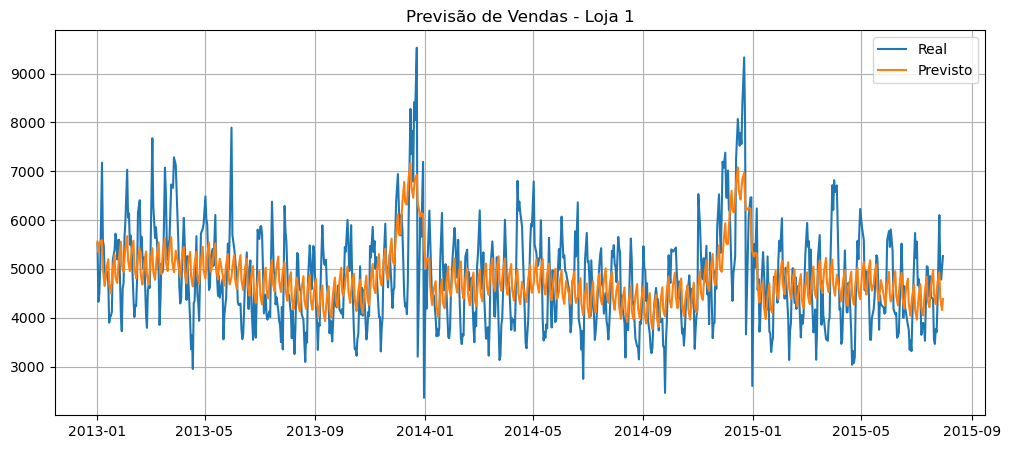

In [6]:
# Gráfico real vs previsto
plt.figure(figsize=(12, 5))
plt.plot(merged['Date'], merged['Sales'], label='Real')
plt.plot(merged['Date'], merged['yhat'], label='Previsto')
plt.title('Previsão de Vendas - Loja 1')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Cria a figura interativa
fig = go.Figure()

# Linha das vendas reais
fig.add_trace(go.Scatter(
    x=merged['Date'],
    y=merged['Sales'],
    mode='lines',
    name='Real',
    line=dict(color='blue')
))

# Linha das vendas previstas para o período conhecido (mesmo período de merged)
fig.add_trace(go.Scatter(
    x=merged['Date'],
    y=merged['yhat'],
    mode='lines',
    name='Previsto',
    line=dict(color='orange')
))

# Linha das previsões futuras (forecast_predict), adicionando só as datas futuras
# Filtra apenas as datas futuras (após último dado real)
future_dates = forecast_predict[forecast_predict['ds'] > merged['Date'].max()]

fig.add_trace(go.Scatter(
    x=future_dates['ds'],
    y=future_dates['yhat'],
    mode='lines',
    name='Previsão Futura',
    line=dict(color='green'),
    marker=dict(size=6)
))

# Layout do gráfico
fig.update_layout(
    title='📈 Previsão de Vendas - Loja 1',
    xaxis_title='Data',
    yaxis_title='Vendas',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white',
    width=1000,
    height=400
)

# Salva como imagem
fig.write_image("../reports/figures/forecast_real_vs_predicted.png")

# Exibe no notebook
fig.show()